#Logistic Regression vs. Neural Networks in Solubility Class Prediction#
##### Aidan Holland, Machine Learning and Molecules #####

##Data Source and Imported Functions##

In [2]:
%%bash
wget https://raw.githubusercontent.com/deepchem/deepchem/master/datasets/delaney-processed.csv

--2023-06-16 12:31:30--  https://raw.githubusercontent.com/deepchem/deepchem/master/datasets/delaney-processed.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96699 (94K) [text/plain]
Saving to: ‘delaney-processed.csv’

     0K .......... .......... .......... .......... .......... 52% 3.94M 0s
    50K .......... .......... .......... .......... ....      100% 13.2M=0.02s

2023-06-16 12:31:31 (5.88 MB/s) - ‘delaney-processed.csv’ saved [96699/96699]



In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
# recall = sensitivity, no sklearn specificity
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

## Code ##

In [4]:
data = pd.read_csv('delaney-processed.csv')
median_solubility = np.median(data['measured log solubility in mols per litre'])
data['solubility_class'] = np.where(data['measured log solubility in mols per litre'] >= median_solubility, 1, 0)
X = data[['Minimum Degree', 'Molecular Weight','Number of H-Bond Donors', 'Number of Rings', 'Number of Rotatable Bonds', 'Polar Surface Area']]
# here I omitted Compound ID and smiles and the log solubility parts of the data
y = data['solubility_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=50)

In [5]:
data

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles,solubility_class
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.770,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,1
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.300,Cc1occc1C(=O)Nc2ccccc2,0
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.060,CC(C)=CCCC(C)=CC(=O),1
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.870,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,0
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.330,c1ccsc1,1
...,...,...,...,...,...,...,...,...,...,...,...
1123,halothane,-2.608,1,197.381,0,0,0,0.00,-1.710,FC(F)(F)C(Cl)Br,1
1124,Oxamyl,-0.908,1,219.266,1,0,1,71.00,0.106,CNC(=O)ON=C(SC)C(=O)N(C)C,1
1125,Thiometon,-3.323,1,246.359,0,0,7,18.46,-3.091,CCSCCSP(=S)(OC)OC,0
1126,2-Methylbutane,-2.245,1,72.151,0,0,1,0.00,-3.180,CCC(C)C,0


**Logistic Regression**

I approximate $F$ as logistic function $y_{predicted} = \frac{1}{(1+e^{-X_{hidden}})}$

I want to find 8 optimized weight values of each of my X's for minimizing the L2 value.

I do this using gradient descent as illustrated in this figure.

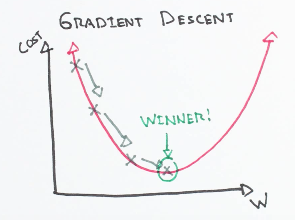

where the weights are updated iteratively for a certain number of **epochs** based on the gradient.

$w_{n+1} = w_n - \alpha \cdot gradient n$

where $\alpha$ is the **learning rate** and

$gradient  = \frac{\partial L2}{\partial w}$.

The quality of the algorithm is analyzed further using a confusion matrix that puts the test ys against the predicted ys, and determines how good of a fit the algorithm is.

In [ ]:
reg = LogisticRegression().fit(X_train,y_train)
# print(reg.intercept_)
# print(reg.coef_)
y_predicted = reg.predict(X_test)
error = y_test - y_predicted
L2 = 0.5 * np.mean(error ** 2)
# print(L2)

In [ ]:
tp, fn, fp, tn = confusion_matrix(y_test, y_predicted, labels=(1,0)).ravel()
print(confusion_matrix(y_test, y_predicted, labels=(1,0)).ravel())
print("accuracy =",accuracy_score(y_test, y_predicted))
print("precision =",precision_score(y_test, y_predicted))
print("sensitivity =",recall_score(y_test, y_predicted))
specificity = tn / (tn+fp)
print("specificity =",specificity)

[45  6 10 52]
accuracy = 0.8584070796460177
precision = 0.8181818181818182
sensitivity = 0.8823529411764706
specificity = 0.8387096774193549


**Neutral Networks**

$F$ is approximated in the following function as the output of neural networks. Forward propagation and backpropagation with a training sample of 90% is used to minimize our loss value calculated from binary crossentropy. A confusion matrix is then used with the original 10% test values against predicted values.

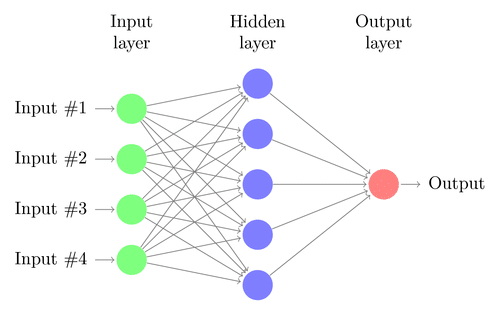

In [ ]:
model = Sequential([
  Dense(50, activation='sigmoid', input_shape=(6,)),
  Dense(10, activation='sigmoid'),
  Dense(1, activation='sigmoid'),
])

adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(
  optimizer=adam,
  loss='binary_crossentropy',
  metrics=['accuracy'],
)

model.fit(
  X_train,
  y_train,
  epochs=100,
  batch_size=64,
)

In [ ]:
nn = model.predict(X_test)
nn = tf.where(nn>0.5,1,0)

tp, fn, fp, tn = confusion_matrix(y_test, nn, labels=(1,0)).ravel()
print(confusion_matrix(y_test, nn, labels=(1,0)).ravel())
print("accuracy =",accuracy_score(y_test, nn))
print("precision =",precision_score(y_test, nn))
print("sensitivity =",recall_score(y_test, nn))
specificity = tn / (tn+fp)
print("specificity =",specificity)

4/4 [==============================] - 0s 4ms/step
[48  3 14 48]
accuracy = 0.8495575221238938
precision = 0.7741935483870968
sensitivity = 0.9411764705882353
specificity = 0.7741935483870968


## Results ##

The raw results from both logistic regression prediction and neutral network prediction can be found in the confusion matrices after the code. The neural network algorithm only has a higher sensitivity because the false negatives total is far lower than the false positives. The logistic regression algorithm has the edge in accuracy, precision, and specificity. The algorithms are very close in quality, but **the logistic regression model is the preferred of the two** by a slim margin.